In [1]:
import pandas
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

UBASEPATH = Path('/iarai/public/t4c/uber')
TBASEPATH = Path('/iarai/public/t4c/data_pipeline/release20221003_keep_all_edges/')
# TBASEPATH = Path('/iarai/public/t4c/data_pipeline/release20220930/')


In [2]:
# uspeeds_df = pandas.read_csv(UBASEPATH / 'movement-speeds-hourly-madrid-2020-3.csv')
# uspeeds_df = pandas.read_csv(UBASEPATH / 'movement-speeds-hourly-london-2019-10.csv')
uspeeds_df = pandas.read_parquet(UBASEPATH / 'movement-speeds-hourly-london-2019-10.parquet')
uspeeds_df['speed_kph_mean'] = uspeeds_df['speed_mph_mean'] * 1.60934
uspeeds_df = uspeeds_df.rename(columns={'osm_start_node_id': 'u', 'osm_end_node_id': 'v'})
uspeeds_df

,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean
0,6504105337,1604745704,147247974,2019,10,9,18,18.752,3.781,30.178344
1,6504105337,1604745704,147247974,2019,10,9,15,19.461,4.255,31.319366
2,6504105337,1604745704,147247974,2019,10,8,18,13.603,4.862,21.891852
3,6504105337,1604745704,147247974,2019,10,8,16,15.450,2.076,24.864303
4,6504105337,1604745704,147247974,2019,10,8,15,17.119,2.450,27.550291
...,...,...,...,...,...,...,...,...,...,...
47121785,4804443645,3863127062,688989358,2019,10,21,19,14.349,4.693,23.092420
47121786,4804443645,3863127062,688989358,2019,10,14,8,12.321,4.213,19.828678
47121787,4804443645,3863127062,688989358,2019,10,4,8,12.269,4.079,19.744992
47121788,4804443645,3863127062,688989358,2019,10,7,8,13.596,7.274,21.880587


In [3]:
# uspeeds_df = uspeeds_df[[
#     'osm_start_node_id', 'osm_end_node_id', 'osm_way_id', 'year', 'month', 'day', 'hour',
#     'speed_mph_mean', 'speed_mph_stddev']]
# uspeeds_df.to_parquet(UBASEPATH / 'movement-speeds-hourly-london-2019-10.parquet', compression='snappy')
# uspeeds_df

In [4]:
uedges_df = uspeeds_df[['u', 'v', 'osm_way_id']].groupby(
    by=['u', 'v']).count().reset_index()
uedges_df = uedges_df.rename(columns={'osm_way_id': 'cnt'})
uedges_df

,u,v,cnt
0,78112,25508583,557
1,78112,25508584,491
2,99936,2146383887,1
3,99936,4544836433,494
4,99937,200047,412
...,...,...,...
242297,6577730921,254761207,520
242298,6577730921,6577730928,2
242299,6577730928,2379175,39
242300,6577745911,36728211,182


<AxesSubplot:>

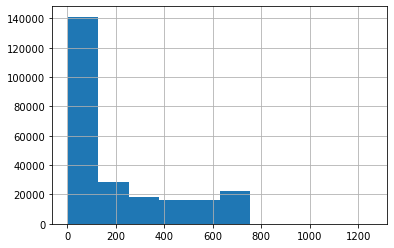

In [5]:
uedges_df['cnt'].hist()

In [6]:
# tedges_df = pandas.read_parquet(TBASEPATH / '2022' / 'road_graph' / 'madrid' / 'road_graph_edges.parquet')
tedges_df = pandas.read_parquet(TBASEPATH / '2022' / 'road_graph' / 'london' / 'road_graph_edges.parquet')
tedges_df

,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,length_meters,geometry
0,99937,2419797751,18769878,48.3,30 mph,trunk,True,3,nan,12.710,b'\x01\x02\x00\x00\x00\x02\x00\x00\x005\x9a\\\...
1,99939,2419809524,18769878,48.3,30 mph,trunk,True,3,nan,2.732,"b'\x01\x02\x00\x00\x00\x02\x00\x00\x00U~c\x19,..."
2,99940,7987865367,233624541,32.2,20 mph,tertiary,False,2,nan,6.349,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\xa2\xba...
3,99940,295924710,293095674,32.2,20 mph,tertiary,False,2,nan,3.446,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\xa2\xba...
4,101831,6981900057,100968809,32.2,20 mph,primary,False,nan,nan,4.808,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00./\n\xcc...
...,...,...,...,...,...,...,...,...,...,...,...
313386,10073191690,1446334376,8136203,48.3,30 mph,secondary,False,2,nan,4.961,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\x05\x08...
313387,10073191697,2352177,262946235,48.3,30 mph,primary,False,4,nan,15.460,"b""\x01\x02\x00\x00\x00\x02\x00\x00\x00}mG\x82\..."
313388,10073191697,5311465149,262946235,48.3,30 mph,primary,False,4,nan,2.673,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00}mG\x82\...
313389,10073191698,5311465149,262946235,48.3,30 mph,primary,False,4,nan,3.382,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\x1d3\x9...


In [7]:
edges_merged_df = uedges_df.merge(tedges_df, on=['u', 'v'])
edges_merged_df

,u,v,cnt,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,length_meters,geometry
0,101843,101851,687,1024418085,32.2,20 mph,primary,False,nan,nan,73.041,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00x\xfa\xf...
1,101843,6548879910,661,1024418086,32.2,20 mph,secondary,False,nan,nan,33.817,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00x\xfa\xf...
2,101851,101843,669,1024418085,32.2,20 mph,primary,False,nan,nan,73.041,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\x80\xdb...
3,101851,6548029263,693,1024418085,32.2,20 mph,primary,False,nan,nan,22.440,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\x80\xdb...
4,101852,6548029255,670,1024418085,32.2,20 mph,primary,False,nan,nan,26.593,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00#*\xf9}\...
...,...,...,...,...,...,...,...,...,...,...,...,...
30643,6575261485,13799167,63,700186278,39.8,nan,tertiary,False,nan,nan,50.503,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\xe1\xf7...
30644,6575261486,6574571863,168,700186279,48.3,30 mph,trunk,True,2,nan,19.946,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\xccm\xb...
30645,6577730921,2379175,410,358627524,32.2,20 mph,tertiary,False,nan,nan,5.938,"b""\x01\x02\x00\x00\x00\x02\x00\x00\x00K\xb9\xb..."
30646,6577730921,254761207,520,358627524,32.2,20 mph,tertiary,False,nan,nan,106.712,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00K\xb9\xb...


<AxesSubplot:>

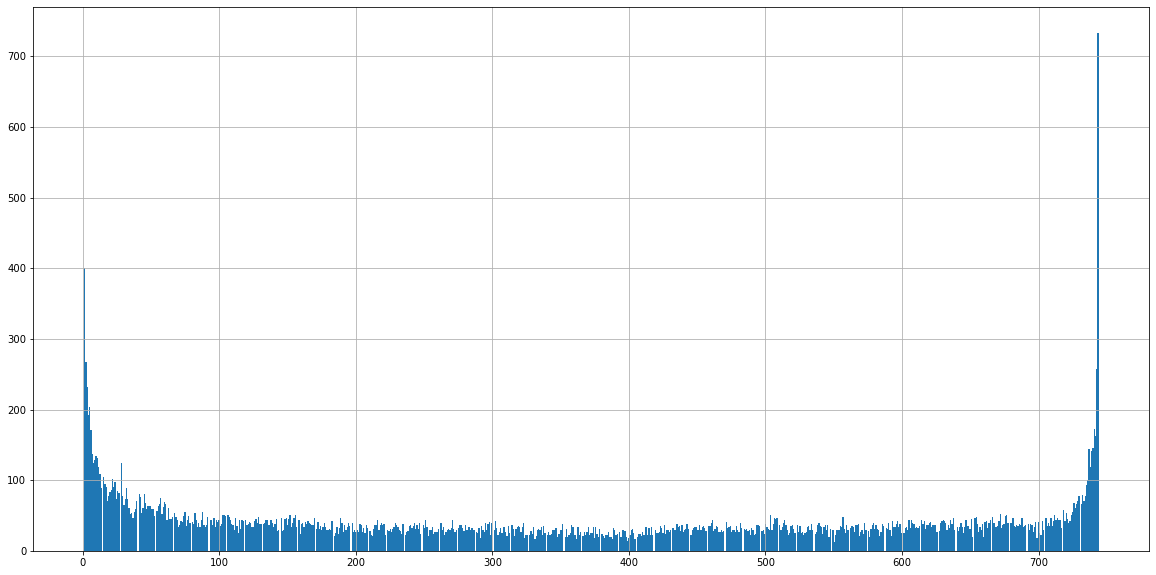

In [8]:
edges_merged_df['cnt'].hist(bins=800, figsize=(20,10))

In [9]:
uspeeds_day_df = uspeeds_df[(uspeeds_df['year'] == 2019) & (uspeeds_df['month'] == 10) & (uspeeds_df['day'] >= 21) & (uspeeds_df['day'] <= 27)]
uspeeds_day_df

,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean
8,1343922650,108500,8179128,2019,10,21,12,11.078,1.550,17.828269
10,1343922650,108500,8179128,2019,10,24,18,11.507,6.372,18.518675
14,1343922650,108500,8179128,2019,10,27,20,9.204,3.180,14.812365
19,1343922650,108500,8179128,2019,10,25,15,10.188,3.018,16.395956
23,1343922650,108500,8179128,2019,10,21,9,9.261,4.482,14.904098
...,...,...,...,...,...,...,...,...,...,...
47121766,4804443645,3863127062,688989358,2019,10,26,9,18.519,6.165,29.803367
47121774,4804443645,3863127062,688989358,2019,10,24,20,15.994,2.497,25.739784
47121781,4804443645,3863127062,688989358,2019,10,24,8,15.435,2.578,24.840163
47121785,4804443645,3863127062,688989358,2019,10,21,19,14.349,4.693,23.092420


<AxesSubplot:>

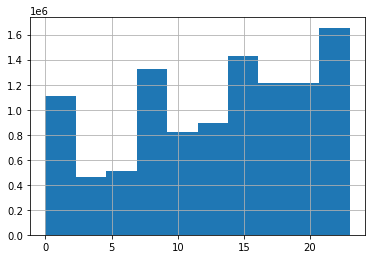

In [10]:
uspeeds_day_df['hour'].hist()

In [12]:
tspeeds_l = []
for i in range(21,28):
    f = TBASEPATH / '2022' / 'speed_classes' / 'london' / f'speed_classes_2019-10-{i}.parquet'
    df = pandas.read_parquet(f)
    df["date"]=df["day"]
    df["day"]=i
    tspeeds_l.append(df)

In [14]:
tspeeds_df = pandas.concat(tspeeds_l)
tspeeds_df

,u,v,gkey,day,t,volume_class,median_speed_kph,free_flow_kph,date
0,99937,2419797751,1821434397898261111,21,0,3,35.529412,28.705882,2019-10-21
1,99937,2419797751,1821434397898261111,21,1,5,96.941176,28.705882,2019-10-21
2,99937,2419797751,1821434397898261111,21,2,1,33.882353,28.705882,2019-10-21
3,99937,2419797751,1821434397898261111,21,3,1,24.000000,28.705882,2019-10-21
4,99937,2419797751,1821434397898261111,21,4,3,12.705882,28.705882,2019-10-21
...,...,...,...,...,...,...,...,...,...
6088699,10073191698,2352178,-5919578462598640252,27,82,5,9.058824,38.352941,2019-10-27
6088700,10073191698,2352178,-5919578462598640252,27,83,5,16.000000,38.352941,2019-10-27
6088701,10073191698,2352178,-5919578462598640252,27,90,5,22.941176,38.352941,2019-10-27
6088702,10073191698,2352178,-5919578462598640252,27,92,3,36.941176,38.352941,2019-10-27


In [15]:
#tspeeds_df = pandas.read_parquet(TBASEPATH / '2022' / 'speed_classes' / 'london' / 'speed_classes_2019-10-07.parquet')
#tspeeds_df

In [16]:
tspeeds_df['hour'] = tspeeds_df['t'] // 4
tspeeds_df

,u,v,gkey,day,t,volume_class,median_speed_kph,free_flow_kph,date,hour
0,99937,2419797751,1821434397898261111,21,0,3,35.529412,28.705882,2019-10-21,0
1,99937,2419797751,1821434397898261111,21,1,5,96.941176,28.705882,2019-10-21,0
2,99937,2419797751,1821434397898261111,21,2,1,33.882353,28.705882,2019-10-21,0
3,99937,2419797751,1821434397898261111,21,3,1,24.000000,28.705882,2019-10-21,0
4,99937,2419797751,1821434397898261111,21,4,3,12.705882,28.705882,2019-10-21,1
...,...,...,...,...,...,...,...,...,...,...
6088699,10073191698,2352178,-5919578462598640252,27,82,5,9.058824,38.352941,2019-10-27,20
6088700,10073191698,2352178,-5919578462598640252,27,83,5,16.000000,38.352941,2019-10-27,20
6088701,10073191698,2352178,-5919578462598640252,27,90,5,22.941176,38.352941,2019-10-27,22
6088702,10073191698,2352178,-5919578462598640252,27,92,3,36.941176,38.352941,2019-10-27,23


<AxesSubplot:>

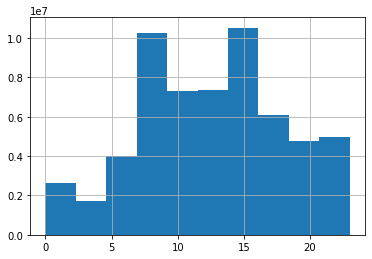

In [17]:
tspeeds_df['hour'].hist()

In [18]:
tspeeds_60min_df = tspeeds_df[['u', 'v', 'day', 'hour', 'volume_class', 'median_speed_kph', 'free_flow_kph']].groupby(
    by=['u', 'v', 'day','hour']).mean().reset_index()
tspeeds_60min_df

,u,v,day,hour,volume_class,median_speed_kph,free_flow_kph
0,99937,2419797751,21,0,2.500000,47.588235,28.705882
1,99937,2419797751,21,1,3.000000,44.235294,28.705882
2,99937,2419797751,21,2,2.333333,28.627451,28.705882
3,99937,2419797751,21,3,2.000000,28.705882,28.705882
4,99937,2419797751,21,4,3.000000,26.205882,28.705882
...,...,...,...,...,...,...,...
29758636,10073191698,5311465149,27,18,3.000000,40.617647,38.352941
29758637,10073191698,5311465149,27,19,5.000000,30.588235,38.352941
29758638,10073191698,5311465149,27,20,1.000000,32.000000,38.352941
29758639,10073191698,5311465149,27,22,3.000000,29.764706,38.352941


In [19]:
tspeeds_merged_df = uspeeds_day_df.merge(tspeeds_60min_df, on=['u', 'v', 'day','hour']).reset_index()
tspeeds_merged_df

,index,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean,volume_class,median_speed_kph,free_flow_kph
0,0,27364351,27364350,622551251,2019,10,22,19,21.431,5.786,34.489766,5.000000,14.352941,38.588235
1,1,27364351,27364350,622551251,2019,10,27,13,21.691,5.344,34.908194,3.000000,55.411765,38.588235
2,2,27364351,27364350,622551251,2019,10,27,15,23.315,3.626,37.521762,3.666667,25.398693,38.588235
3,3,27364351,27364350,622551251,2019,10,24,10,19.974,3.080,32.144957,3.000000,30.970588,38.588235
4,4,27364351,27364350,622551251,2019,10,21,16,14.467,6.343,23.282322,5.000000,16.117647,38.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750226,1750226,2617935383,21390703,497816674,2019,10,21,15,18.061,4.726,29.066290,3.000000,16.000000,29.647059
1750227,1750227,2617935383,21390703,497816674,2019,10,26,17,14.886,6.345,23.956635,2.000000,28.705882,29.647059
1750228,1750228,792582448,919564861,371202326,2019,10,25,17,18.790,2.023,30.239499,3.000000,39.058824,32.941176
1750229,1750229,792582448,919564861,371202326,2019,10,26,18,17.937,2.599,28.866732,3.000000,35.294118,32.941176


<AxesSubplot:xlabel='hour', ylabel='speed_kph_mean'>

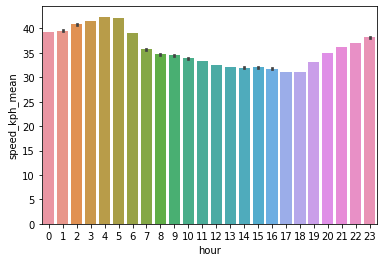

In [20]:
sns.barplot(data=uspeeds_day_df, x="hour", y="speed_kph_mean")

<AxesSubplot:xlabel='hour', ylabel='median_speed_kph'>

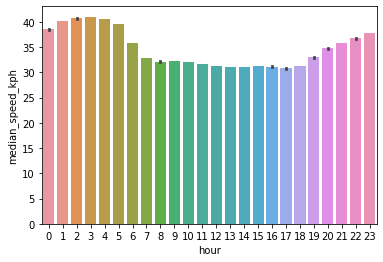

In [21]:
sns.barplot(data=tspeeds_60min_df, x="hour", y="median_speed_kph")

<AxesSubplot:xlabel='hour', ylabel='Count'>

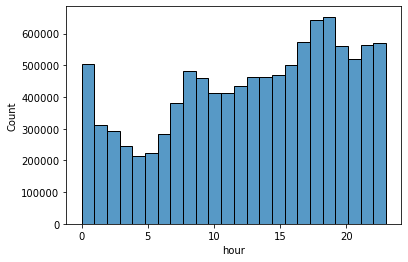

In [22]:
sns.histplot(data=uspeeds_day_df, x="hour", bins=24)

<AxesSubplot:xlabel='hour', ylabel='Count'>

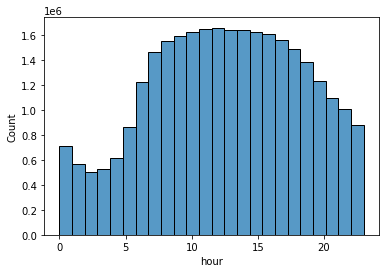

In [23]:
sns.histplot(data=tspeeds_60min_df, x="hour", bins=24)

In [24]:
tspeeds_merged_df["factor"]=tspeeds_merged_df["speed_mph_stddev"]/tspeeds_merged_df["speed_mph_mean"]
tspeeds_merged_df

,index,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean,volume_class,median_speed_kph,free_flow_kph,factor
0,0,27364351,27364350,622551251,2019,10,22,19,21.431,5.786,34.489766,5.000000,14.352941,38.588235,0.269983
1,1,27364351,27364350,622551251,2019,10,27,13,21.691,5.344,34.908194,3.000000,55.411765,38.588235,0.246369
2,2,27364351,27364350,622551251,2019,10,27,15,23.315,3.626,37.521762,3.666667,25.398693,38.588235,0.155522
3,3,27364351,27364350,622551251,2019,10,24,10,19.974,3.080,32.144957,3.000000,30.970588,38.588235,0.154200
4,4,27364351,27364350,622551251,2019,10,21,16,14.467,6.343,23.282322,5.000000,16.117647,38.588235,0.438446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750226,1750226,2617935383,21390703,497816674,2019,10,21,15,18.061,4.726,29.066290,3.000000,16.000000,29.647059,0.261669
1750227,1750227,2617935383,21390703,497816674,2019,10,26,17,14.886,6.345,23.956635,2.000000,28.705882,29.647059,0.426239
1750228,1750228,792582448,919564861,371202326,2019,10,25,17,18.790,2.023,30.239499,3.000000,39.058824,32.941176,0.107664
1750229,1750229,792582448,919564861,371202326,2019,10,26,18,17.937,2.599,28.866732,3.000000,35.294118,32.941176,0.144896


<AxesSubplot:xlabel='median_speed_kph', ylabel='speed_kph_mean'>

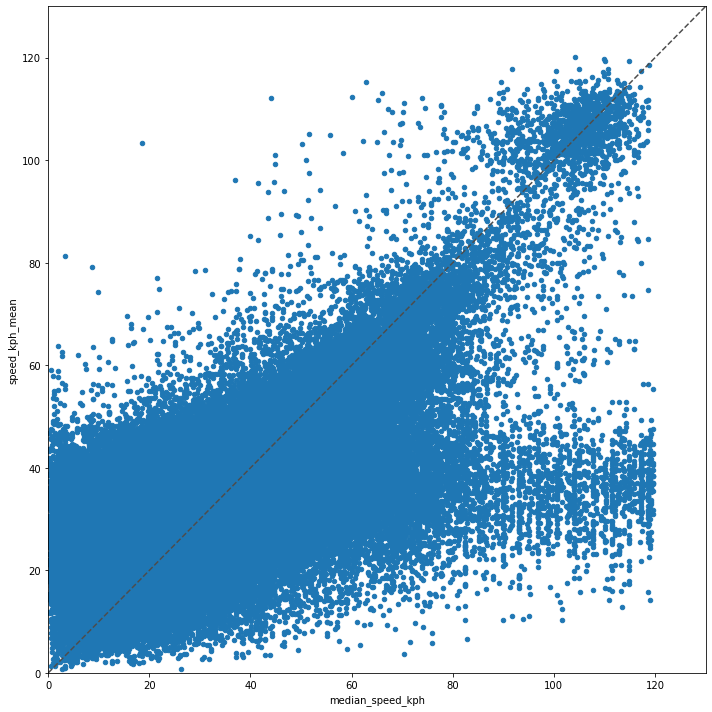

In [53]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10,10))
ax.plot([0, 130], [0, 130], ls="--", c=".3")
ax.set_xlim([0,130])
ax.set_ylim([0,130])
#tspeeds_merged_df[(tspeeds_merged_df["day"]==27)&(tspeeds_merged_df["median_speed_kph"]>60)&(tspeeds_merged_df["speed_kph_mean"]<50)].plot(kind='scatter', x='median_speed_kph', y='speed_kph_mean', figsize=(10,10), ax=ax)
tspeeds_merged_df[(tspeeds_merged_df["day"]==27)].plot(kind='scatter', x='median_speed_kph', y='speed_kph_mean', figsize=(10,10), ax=ax)

#sns.kdeplot(
#    data=tspeeds_merged_df[(tspeeds_merged_df["day"]==27)], x='median_speed_kph', y='speed_kph_mean', fill=True, ax=ax
#)

In [26]:
import geopandas
#edges_df = geopandas.read_parquet(data_folder / "road_graph" / city / "road_graph_freeflow.parquet")
edges_gdf = geopandas.read_parquet(TBASEPATH / '2022' / 'road_graph' / 'london' / 'road_graph_edges.parquet')

In [27]:
bottom_right = edges_gdf.merge(tspeeds_merged_df[(tspeeds_merged_df["day"]==27)&(tspeeds_merged_df["median_speed_kph"]>60)&(tspeeds_merged_df["speed_kph_mean"]<50)], on=["u", "v"])
bottom_right

,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,length_meters,...,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean,volume_class,median_speed_kph,free_flow_kph,factor
0,101852,6548029255,1024418085,32.2,20 mph,primary,False,nan,nan,26.593,...,10,27,5,28.619,5.229,46.057701,1.000000,64.000000,38.823529,0.182711
1,101875,942808951,2599450,32.2,20 mph,trunk,False,4,nan,28.562,...,10,27,11,24.056,4.481,38.714283,5.000000,90.235294,34.470588,0.186274
2,101875,942808951,2599450,32.2,20 mph,trunk,False,4,nan,28.562,...,10,27,12,23.446,4.659,37.732586,1.000000,60.705882,34.470588,0.198712
3,101884,5742421350,65416745,32.2,20 mph,trunk,False,3,nan,1.641,...,10,27,11,20.643,3.733,33.221606,1.000000,72.000000,36.705882,0.180836
4,101887,301479881,2599341,32.2,20 mph,trunk,False,2,nan,29.203,...,10,27,11,18.055,9.136,29.056634,5.000000,63.294118,33.882353,0.506009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,6573256894,30244337,709859144,48.3,30 mph,primary,True,nan,nan,5.814,...,10,27,21,16.137,3.141,25.969920,1.000000,61.882353,26.901961,0.194646
6518,6573256894,30244337,709859144,48.3,30 mph,primary,True,nan,nan,5.814,...,10,27,4,15.633,2.184,25.158812,1.000000,62.588235,26.901961,0.139704
6519,6573256895,30244342,709859146,48.3,30 mph,primary,True,nan,nan,7.479,...,10,27,21,16.456,3.518,26.483299,2.333333,90.352941,28.705882,0.213782
6520,6577730921,254761207,358627524,32.2,20 mph,tertiary,False,nan,nan,106.712,...,10,27,11,18.679,3.055,30.060862,5.000000,81.882353,28.705882,0.163553


<AxesSubplot:>

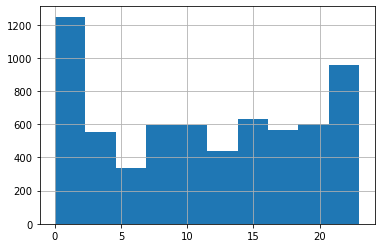

In [28]:
bottom_right["hour"].hist()

In [29]:
bottom_right.groupby("highway").agg(count=("u", "count")).sort_values("count", ascending=False)

,count
highway,
primary,2914
trunk,1370
tertiary,931
secondary,664
trunk_link,515
primary_link,100
tertiary_link,18
motorway,9
secondary_link,1


In [30]:
#bottom_right.to_file("bla.gkpg", driver="GPKG", layer="edges_ff")

<AxesSubplot:>

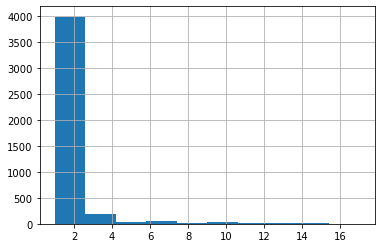

In [31]:
tspeeds_merged_df[(tspeeds_merged_df["day"]==27)&(tspeeds_merged_df["median_speed_kph"]>60)&(tspeeds_merged_df["speed_kph_mean"]<50)].groupby(["u", "v"]).count()["year"].hist()

In [32]:
tspeeds_merged_df["median_speed_kph"].mean()

31.486455927908306

In [33]:
tspeeds_merged_df["median_speed_kph"].median()

29.647058823529413

In [34]:
tspeeds_merged_df["median_speed_kph"].std()

14.811861865292068

<AxesSubplot:>

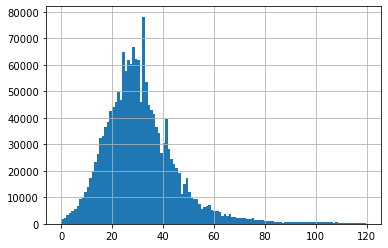

In [35]:
tspeeds_merged_df["median_speed_kph"].hist(bins=120)

In [36]:
tspeeds_merged_df["speed_kph_mean"].mean()

34.00104013903196

In [37]:
tspeeds_merged_df["speed_kph_mean"].median()

33.5466923

In [38]:
tspeeds_merged_df["speed_kph_mean"].std()

11.807432467772898

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


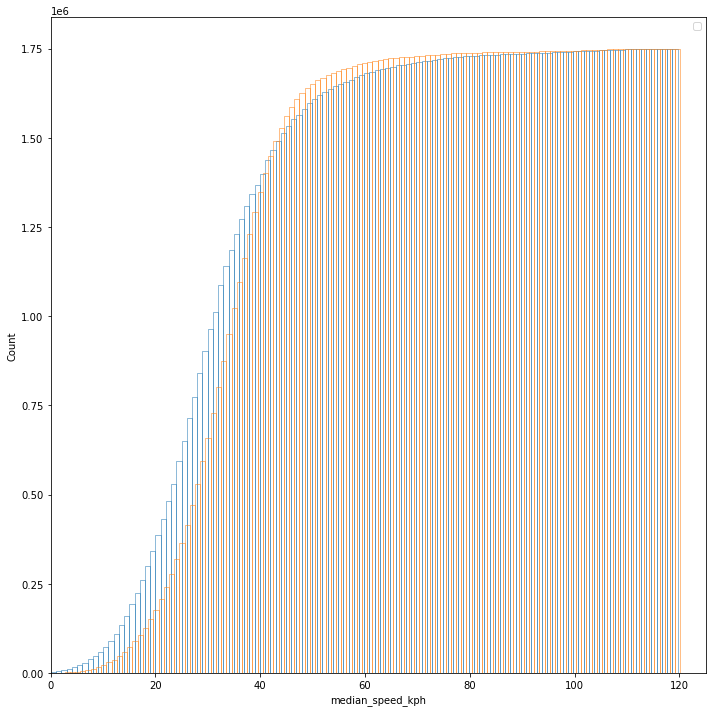

In [39]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10,10))
ax.set_xlim([0,125])
sns.histplot(tspeeds_merged_df, x="median_speed_kph", bins=120, ax=ax, cumulative=True, fill=False)
sns.histplot(tspeeds_merged_df, x="speed_kph_mean", bins=120, ax=ax, cumulative=True, fill=False)
ax.legend()

<AxesSubplot:xlabel='median_speed_kph', ylabel='speed_kph_mean'>

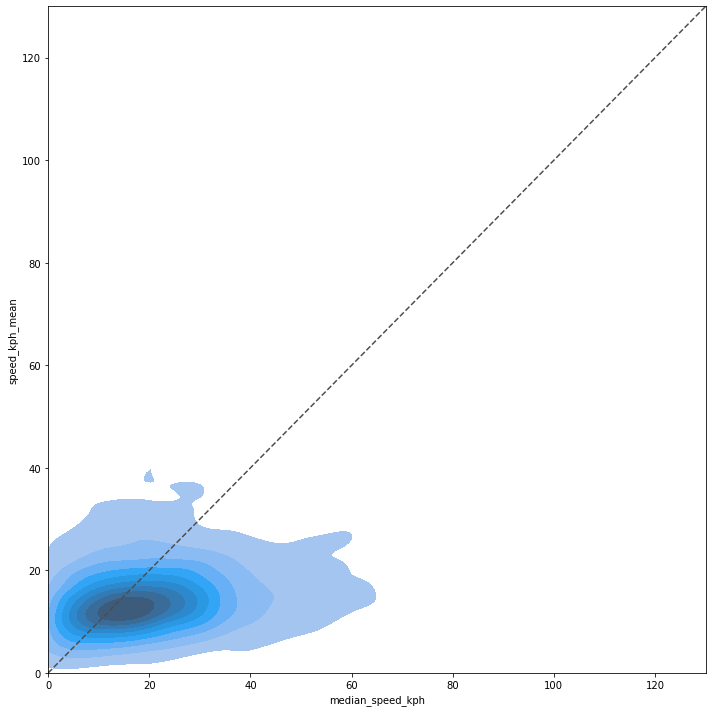

In [40]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10,10))
ax.plot([0, 130], [0, 130], ls="--", c=".3")
ax.set_xlim([0,130])
ax.set_ylim([0,130])
#tspeeds_merged_df[(tspeeds_merged_df["day"]==27)&(tspeeds_merged_df["factor"]>.8)].plot(kind='scatter', x='median_speed_kph', y='speed_kph_mean', figsize=(10,10), ax=ax)
sns.kdeplot(
    data=tspeeds_merged_df[(tspeeds_merged_df["day"]==27)&(tspeeds_merged_df["factor"]>.8)], x='median_speed_kph', y='speed_kph_mean', fill=True, ax=ax
)

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt

#fig, ax = plt.subplots(1, tight_layout=True, figsize=(20,20))
#ax.set_xlim([0,130])
#ax.set_ylim([0,130])
#sns.kdeplot(
#    data=tspeeds_merged_df, x='median_speed_kph', y='speed_kph_mean', fill=True, ax=axs
#)


In [42]:
day_counts = tspeeds_merged_df.groupby(["u", "v"]).agg(daycount=("hour", "count"), speed_kph_mean=("speed_kph_mean","mean"))
day_counts

daycount  speed_kph_mean
u          v                                   
101843     101851           119       33.961415
           6548879910       120       27.805157
101851     101843           117       18.407810
           6548029263       112       36.694231
101852     6548029255       110       39.670758
...                         ...             ...
6575261485 13799167          10       15.726470
6575261486 6574571863        14       29.140779
6577730921 2379175           35       19.256305
           254761207         67       28.153290
6577745911 5930672687        77       47.819532

[28501 rows x 2 columns]

In [43]:
day_counts.sort_values("speed_kph_mean", ascending=False)

,,daycount,speed_kph_mean
u,v,,
208361,241794884,147,109.078843
242745375,424188729,139,108.225383
292158,292160,97,107.987228
242717999,202026,137,107.152007
241794879,104472,126,107.139167
...,...,...,...
5034506700,256794579,136,5.533349
690254158,1734270334,1,5.119311
5374083463,5374083447,3,5.079077


In [65]:
day_counts[(day_counts["daycount"]>20)&(day_counts["daycount"]<100)].sort_values("speed_kph_mean", ascending=False)

,,daycount,speed_kph_mean
u,v,,
292158,292160,97,107.987228
195801,6314352602,49,101.636521
6314352378,195802,37,96.662267
257909038,257909058,54,88.087016
257908918,257908708,61,86.193322
...,...,...,...
1055549339,199584,44,6.695476
336087679,348414879,63,6.532030
25893662,6113891193,21,6.404867


In [59]:
tspeeds_merged_df[(tspeeds_merged_df["v"]==u)]

,index,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean,volume_class,median_speed_kph,free_flow_kph,factor


In [66]:
# M25: 
#      https://www.openstreetmap.org/node/206224677#map=16/51.2582/-0.2024
#      https://www.openstreetmap.org/node/1639045045#map=15/51.2641/-0.1821
u=206224677
v=1639045045

#??
#u=6573256890
#v=771703067

#u=6563498350
#v=6563498349

u=292158
v=292160
edge_df = tspeeds_merged_df[(tspeeds_merged_df["u"]==u)&(tspeeds_merged_df["v"]==v)].reset_index()
edge_df = edge_df.sort_values(["day","hour"])
edge_df

,level_0,index,u,v,osm_way_id,year,month,day,hour,speed_mph_mean,speed_mph_stddev,speed_kph_mean,volume_class,median_speed_kph,free_flow_kph,factor
29,259127,259127,292158,292160,87026958,2019,10,21,7,66.818,3.744,107.532880,3.000000,105.470588,120.0,0.056033
80,259178,259178,292158,292160,87026958,2019,10,21,8,67.362,6.206,108.408361,2.000000,111.294118,120.0,0.092129
92,259190,259190,292158,292160,87026958,2019,10,21,9,70.148,5.560,112.891982,1.666667,99.843137,120.0,0.079261
37,259135,259135,292158,292160,87026958,2019,10,21,10,63.821,5.856,102.709688,2.000000,94.117647,120.0,0.091757
30,259128,259128,292158,292160,87026958,2019,10,21,11,67.248,4.395,108.224896,1.000000,99.764706,120.0,0.065355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,259157,259157,292158,292160,87026958,2019,10,27,17,62.820,6.484,101.098739,3.000000,109.568627,120.0,0.103216
71,259169,259169,292158,292160,87026958,2019,10,27,18,65.646,6.299,105.646734,2.000000,109.058824,120.0,0.095954
79,259177,259177,292158,292160,87026958,2019,10,27,20,67.782,5.341,109.084284,1.000000,103.294118,120.0,0.078797
90,259188,259188,292158,292160,87026958,2019,10,27,21,65.266,3.923,105.035184,1.000000,110.588235,120.0,0.060108


(0.0, 130.0)

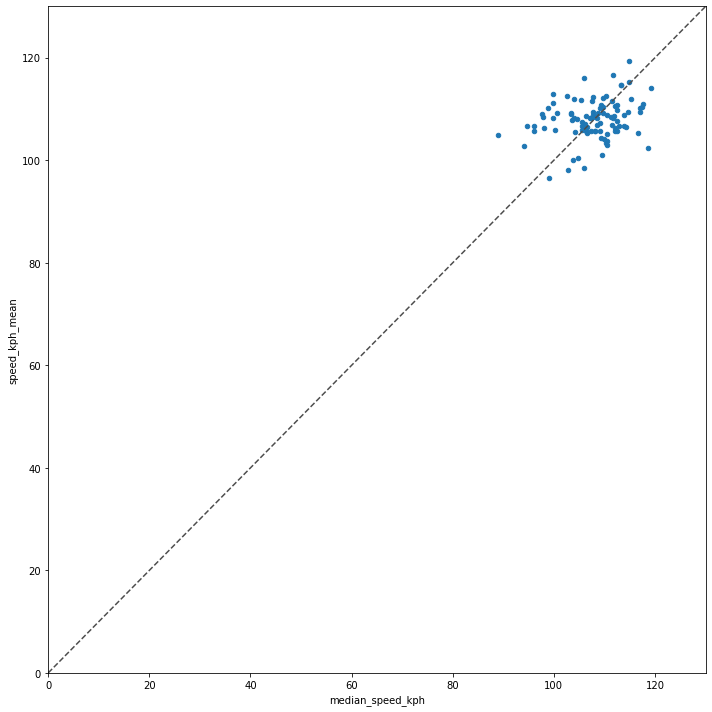

In [67]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10,10))
edge_df.plot(kind='scatter', x='median_speed_kph', y='speed_kph_mean', ax=ax)
ax.plot([0, 130], [0, 130], ls="--", c=".3")
ax.set_xlim([0,130])
ax.set_ylim([0,130])

In [68]:
edge_df["median_speed_kph"].mean()

107.7796644430968

In [69]:
edge_df["median_speed_kph"].std()

5.928667448137509

In [70]:
edge_df["speed_kph_mean"].mean()

107.98722832515465

In [71]:
edge_df["speed_kph_mean"].std()

3.9074671671123924

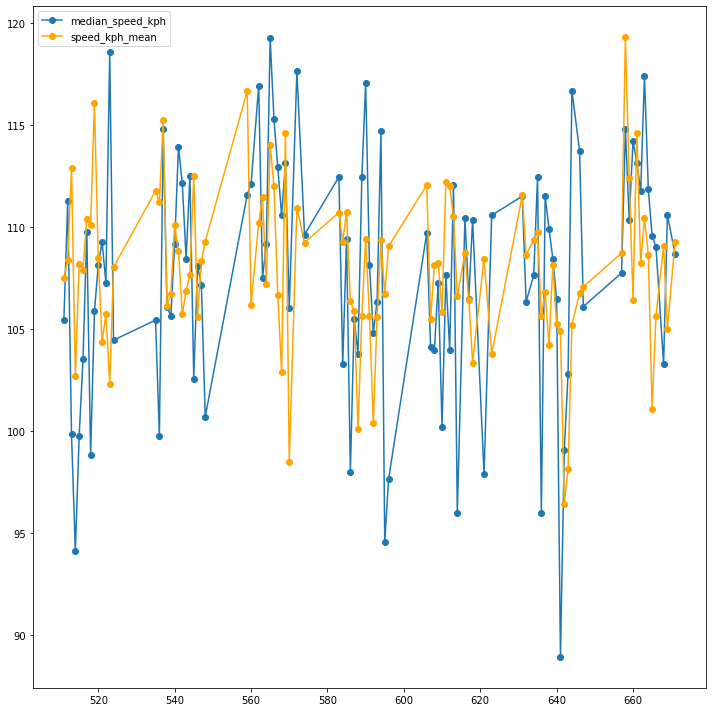

In [72]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10,10))
plt.plot(edge_df["day"]*24+edge_df["hour"], edge_df["median_speed_kph"], marker='o', label="median_speed_kph")
plt.plot(edge_df["day"]*24+edge_df["hour"], edge_df["speed_kph_mean"], color="orange", marker='o', label="speed_kph_mean")
plt.legend()